# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/final_data.csv')
df

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.000000,1.00,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.000000,0.00,...,2,145,84,58,42,1678,1158,448313.054,2168,220
2,13,63,1,9,0,783,3874,4023,0.000000,1.00,...,27,1173,390,246,308,5003,5784,1435958.164,2047,817
3,4,28,0,9,0,270,1589,1738,0.000000,0.90,...,10,81,20,12,16,438,343,107171.103,2021,761
4,22,38,0,9,0,784,3874,4023,0.000000,1.00,...,27,711,528,246,218,1129,2593,419622.336,2020,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356272,10,27,1,9,0,390,1937,1937,0.000000,1.00,...,13,2265,462,312,298,15127,15472,3923982.034,577,535
356273,4,31,1,4,0,390,1937,1937,0.000000,1.00,...,13,290,95,45,29,2500,2659,668510.530,580,531
356274,5,21,0,9,0,490,2189,2189,0.000000,0.25,...,12,1758,473,293,278,6635,5013,1780429.233,545,529
356275,5,22,1,7,0,540,1782,1782,0.000000,1.00,...,18,953,178,74,164,7081,7023,1865451.074,548,527


# EDA

In [3]:
df.columns

Index(['city', 'bd', 'gender', 'registered_via', 'is_churn',
       'payment_plan_sum', 'plan_list_price', 'actual_amount_paid',
       'discount_rate', 'is_auto_renew', 'is_cancel', 'transaction_count',
       'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'registration_duration', 'listening_duration'],
      dtype='object')

1. 범주형 데이터 분포 분석
- gender
- city
- registered_via
- is_auto_renew
- is_calcel

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\699823846.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\699823846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\699823846.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\699823846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

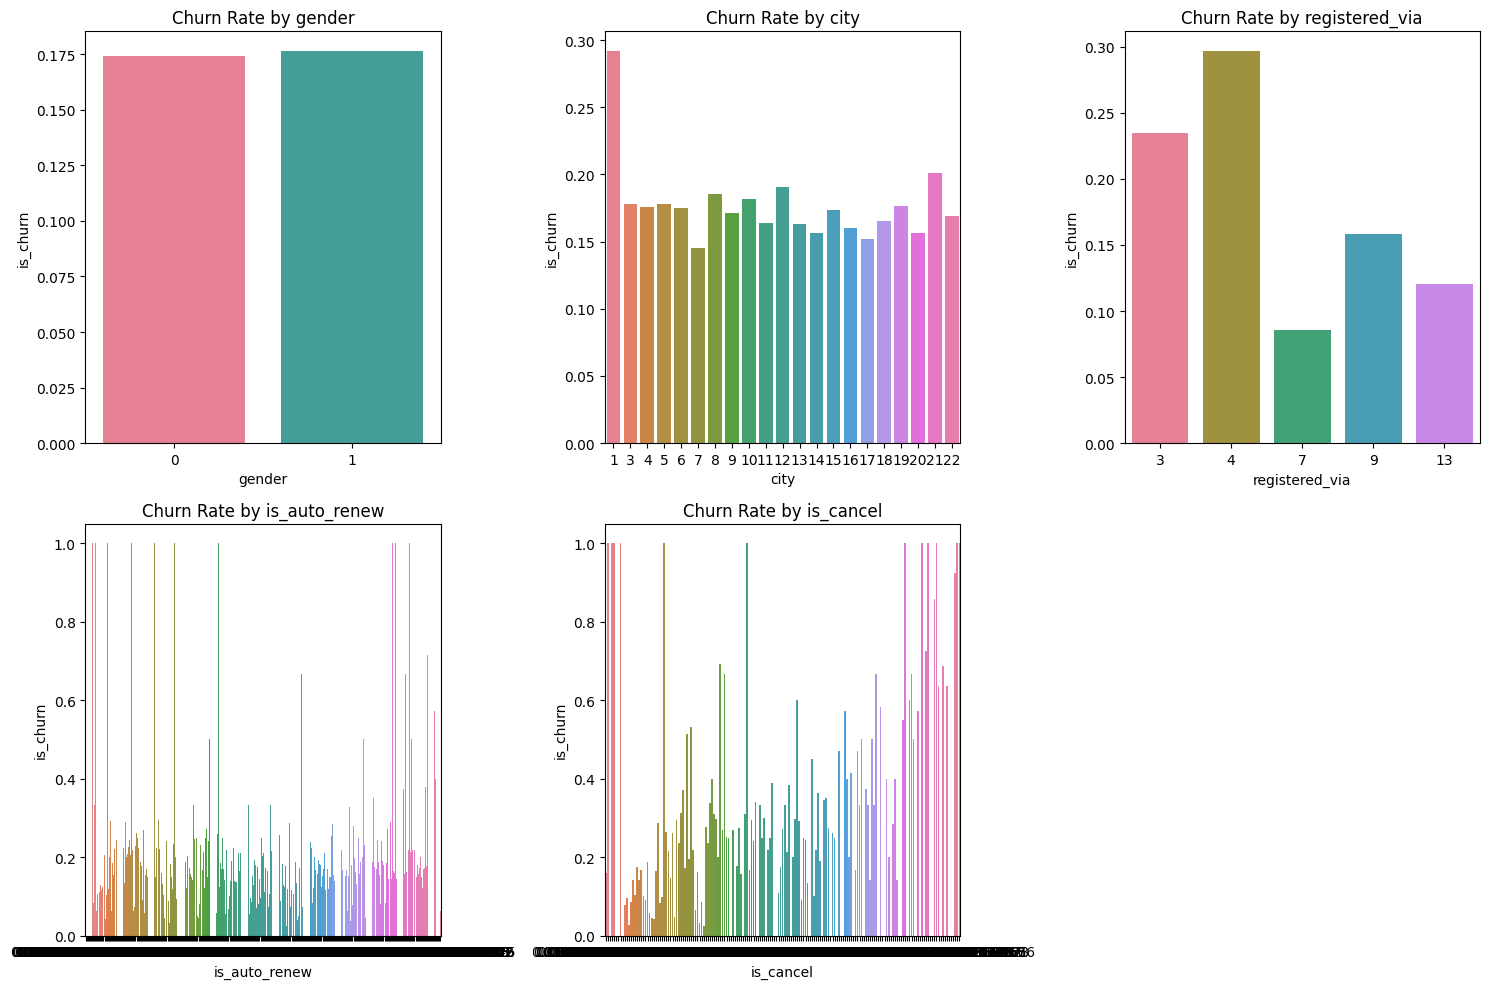

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'city', 'registered_via', 'is_auto_renew', 'is_cancel']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y="is_churn", data=df, ci=None, palette="husl")
    plt.title(f"Churn Rate by {col}")

plt.tight_layout()
plt.show()


- 성별(gender): 특정 성별이 더 많이 이탈하는가? 성별에서는 이탈율이 비등
- 도시(city): 특정 지역에서 이탈률이 높은가? 1번 도시일 수록 이탈율 큼
- 가입 경로(registered_via): 특정 가입 경로가 이탈률에 영향을 주는가? 4번경로로 가입한 사람일 경우에 이탈율이 큼
- 자동 갱신 여부(is_auto_renew): 자동 갱신이 이탈을 줄이는가? 꼭 그런거같지 않음 (추가 분석필요)
- 구독 취소 여부(is_cancel): 구독 취소 경험이 이탈로 이어지는가? 꼭 그런거 같지 않음 (추가 분석필요)

2. 수치형 변수 분포 및 상관관계 분석
- heatmap
- boxplot

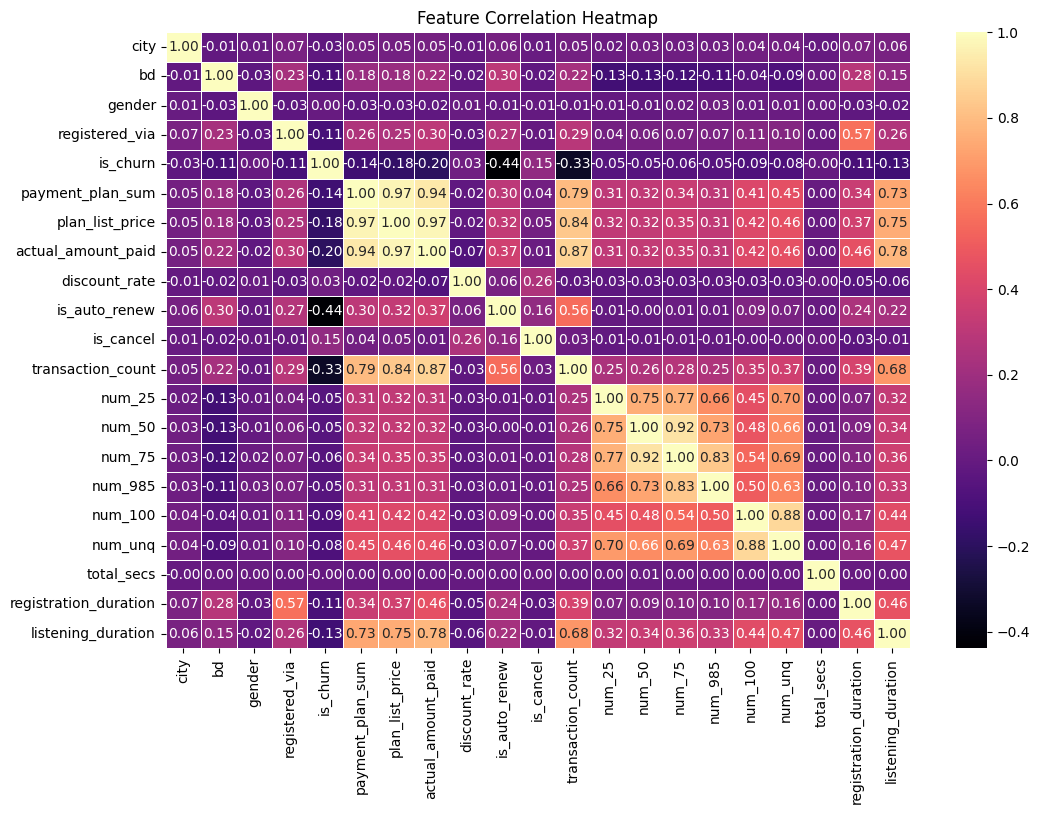

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\1539348973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\1539348973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15900\1539348973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
C:\Users\Playdata\AppData\Local\Temp\ipykernel

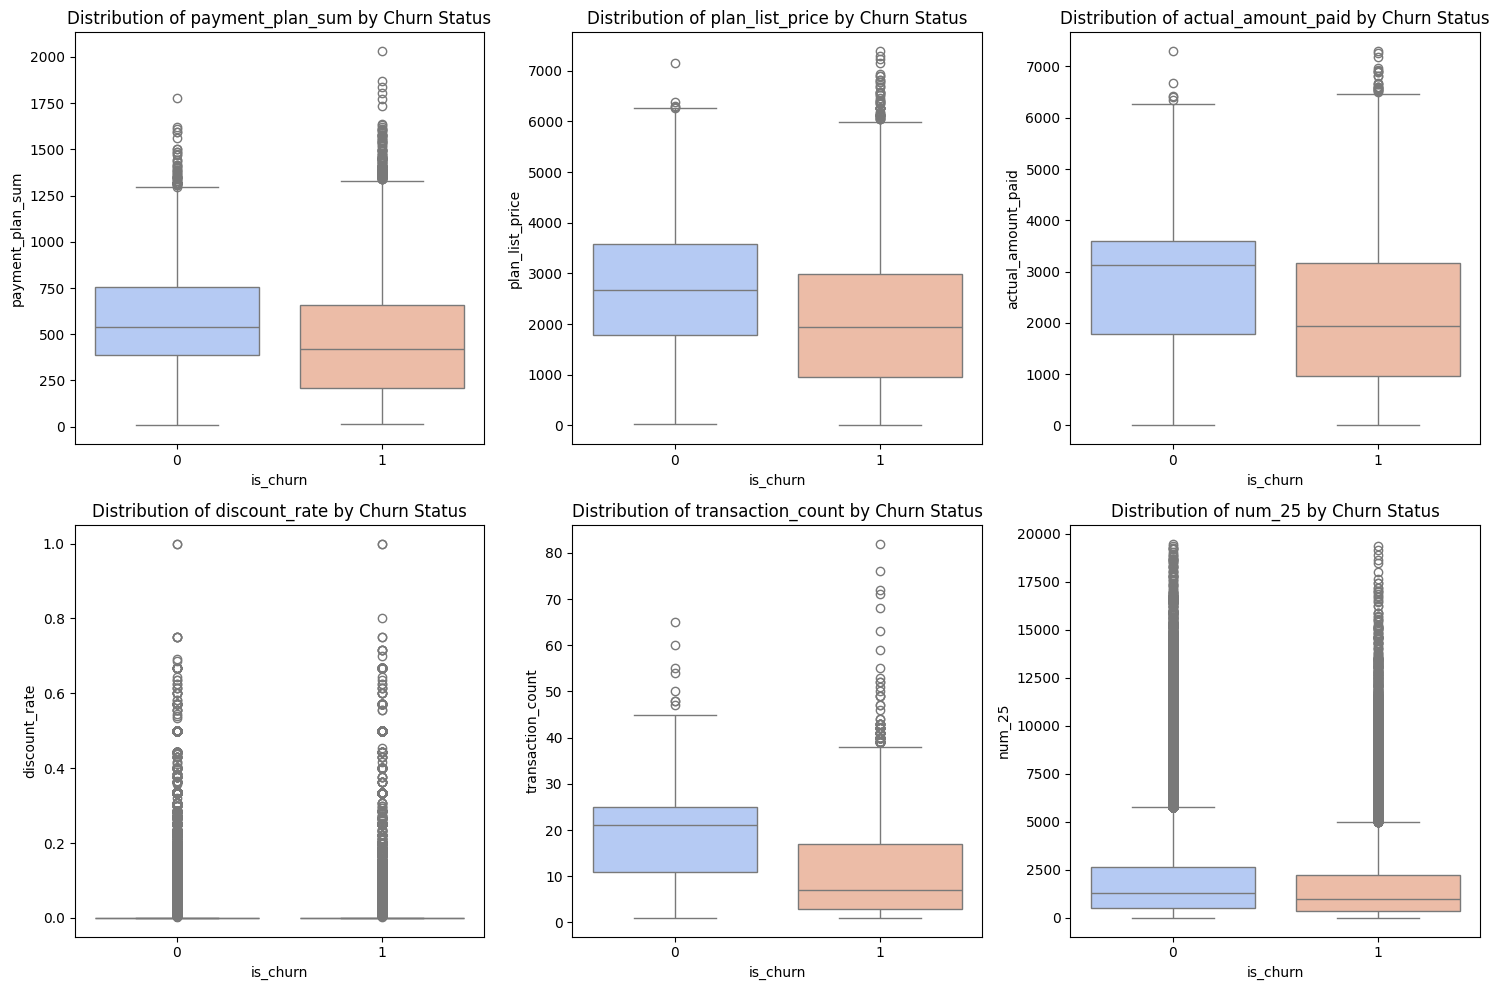

In [11]:
numerical_features = [
    'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'discount_rate',
    'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
    'num_unq', 'total_secs', 'registration_duration', 'listening_duration'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features[:6], 1):  # 일부 컬럼만 예제
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_churn', y=col, data=df, palette="coolwarm")
    plt.title(f"Distribution of {col} by Churn Status")

plt.tight_layout()
plt.show()


3. 특성간 관계 시각화

- 결제금액 vs 이탈율

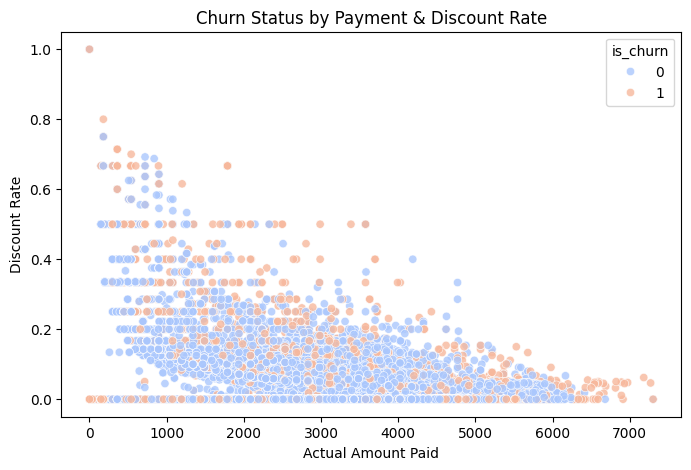

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='actual_amount_paid', y='discount_rate', hue='is_churn', alpha=0.8, palette="coolwarm")
plt.xlabel("Actual Amount Paid")
plt.ylabel("Discount Rate")
plt.title("Churn Status by Payment & Discount Rate")
plt.show()


- 할인을 많이 받은 고객이 더 많이 이탈하는가?
- 비싼 플랜을 결제한 고객은 오래 유지되는가?

    - 결론: 할인을 많이 받지 않으면서 비싼 플랜을 결재한 고객일 수록 이탈율이 높다, 보통 데이터가 많이 분포한 곳에서의 이탈율은 다른 변수가 작용했을 가능성이 있다.

- 고객 청취 행동 분석

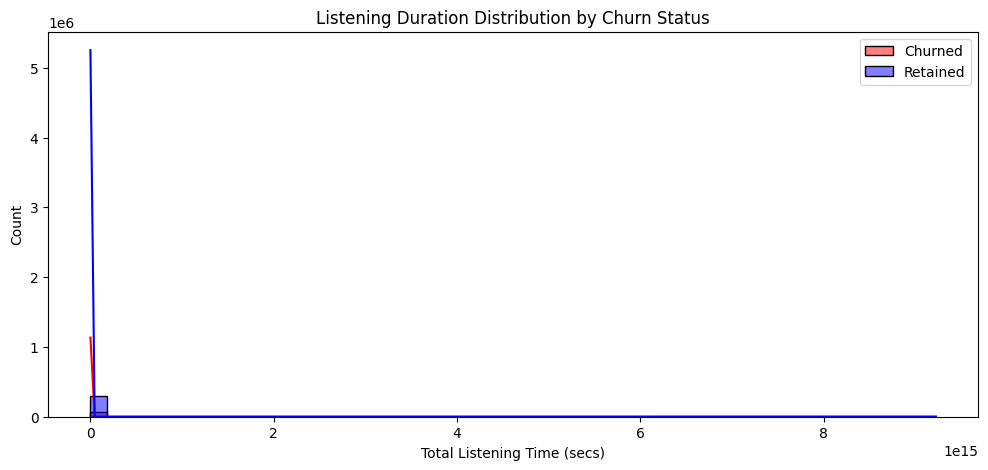

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['is_churn'] == 1]['total_secs'], bins=50, color='red', label="Churned", kde=True)
sns.histplot(df[df['is_churn'] == 0]['total_secs'], bins=50, color='blue', label="Retained", kde=True)
plt.xlabel("Total Listening Time (secs)")
plt.ylabel("Count")
plt.legend()
plt.title("Listening Duration Distribution by Churn Status")
plt.show()


- 청취 시간이 적은 고객이 더 많이 이탈하는가?
- 이탈 고객과 유지 고객의 청취 시간 차이가 확연한가?